<a href="https://colab.research.google.com/github/Reddydhanush23/CSA4705-Deep-Learning/blob/main/Program%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Binary Confusion Matrix:
 [[21  1]
 [ 2 21]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.95      0.91      0.93        23

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



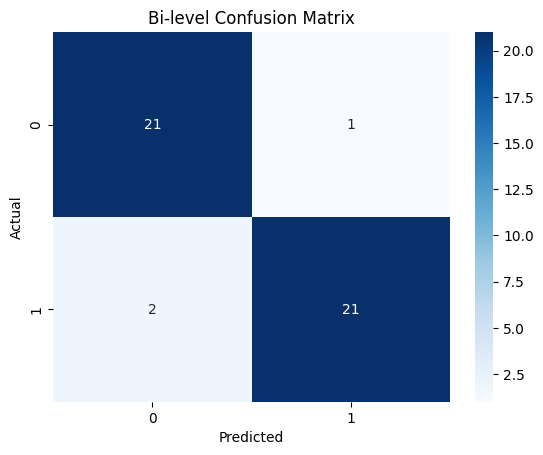


Multi-class Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



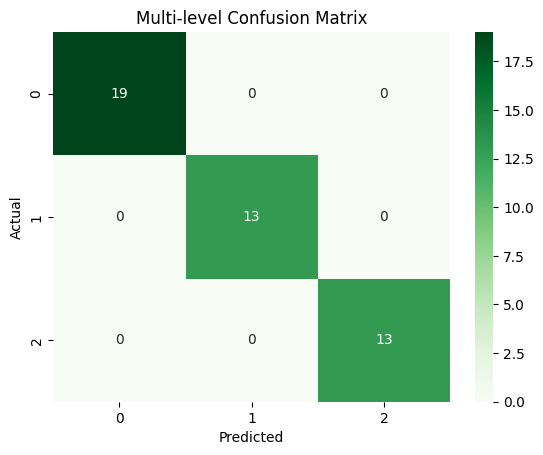

In [1]:
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
X, y = make_classification(n_samples=150, n_features=4, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Binary Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Bi-level Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nMulti-class Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Multi-level Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


=== EXPERIMENT 2: OVERFITTING VERIFICATION ===
Training R² Score: 0.989
Testing R² Score : 0.99
✅ Model generalizes well.



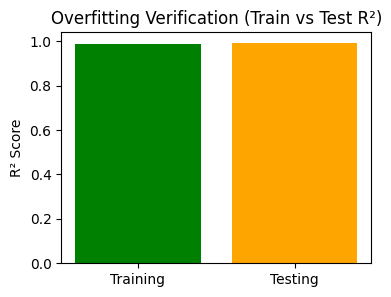

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression, make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=200, n_features=5, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("=== EXPERIMENT 2: OVERFITTING VERIFICATION ===")
print("Training R² Score:", round(train_score, 3))
print("Testing R² Score :", round(test_score, 3))
if train_score - test_score > 0.1:
    print("Model may be overfitting.")
else:
    print("Model generalizes well.\n")
plt.figure(figsize=(4,3))
plt.bar(['Training', 'Testing'], [train_score, test_score], color=['green', 'orange'])
plt.title('Overfitting Verification (Train vs Test R²)')
plt.ylabel('R² Score')
plt.show()



R² Score: 0.966


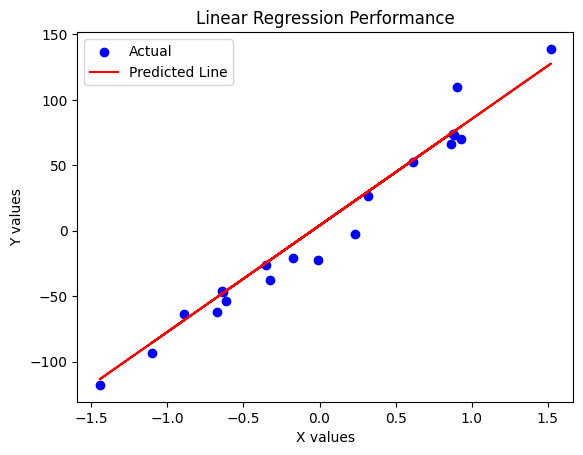

In [7]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Score:", round(r2, 3))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted Line')
plt.title('Linear Regression Performance')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.show()


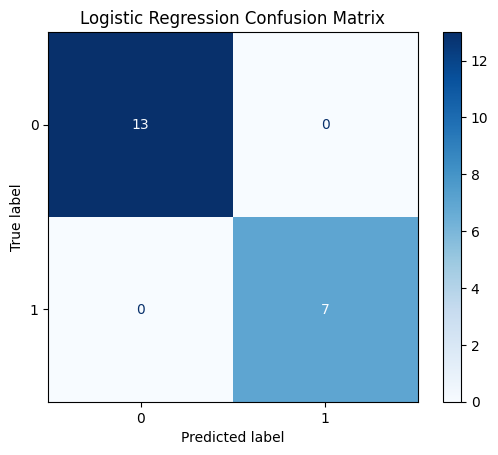

Accuracy: 100.0 %


In [10]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()
accuracy = (cm[0,0] + cm[1,1]) / np.sum(cm)
print("Accuracy:", round(accuracy * 100, 2), "%")


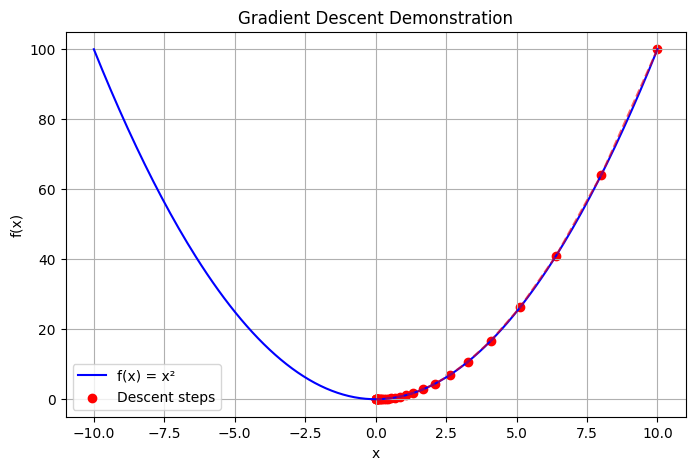

Final minimum x value: 0.0124
Minimum function value f(x): 0.0002


In [14]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def df(x):
    return 2*x

x_old = 10
learning_rate = 0.1
iterations = 30
x_list = [x_old]
y_list = [f(x_old)]
for i in range(iterations):
    grad = df(x_old)
    x_new = x_old - learning_rate * grad
    x_old = x_new
    x_list.append(x_old)
    y_list.append(f(x_old))
x_vals = np.linspace(-10, 10, 200)
y_vals = f(x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, label='f(x) = x²', color='blue')
plt.scatter(x_list, y_list, color='red', label='Descent steps')
plt.plot(x_list, y_list, color='red', linestyle='--', alpha=0.6)
plt.title('Gradient Descent Demonstration')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Final minimum x value: {x_old:.4f}")
print(f"Minimum function value f(x): {f(x_old):.4f}")
